# Business Analytics Project

### Table of Contents

* [Project description](#Project-description) 

    * [Data legend](#Data-legend)


 <p/> 
 
* [Step 1. Download the data and prepare it for analysis](#Step1.-Download-the-data-and-prepare-it-for-analysis) 



 <p/> 

* [Step 2. Make reports and calculate metrics](#Step-2.-Make-reports-and-calculate-metrics)    <p/>       
           
    * [2.1 Product](#2.1-Product)
        
        * [2.1.1 How many people use it every day, week, and month?](#2.1.1-How-many-people-use-it-every-day,-week,-and-month?)
        * [2.1.3 How many sessions are there per day?](#2.1.3-How-many-sessions-are-there-per-day?)
        * [2.1.4 What is the length of each session?](#2.1.4-What-is-the-length-of-each-session?)
        *[2.1.5 How often do users come back?](#2.1.5-How-often-do-users-come-back?)
    <p/> 
    * [2.2 Sales](#-2.2-Sales)
    
        * [2.2.1 When do people start buying?](#2.2.1-When-do-people-start-buying?)
        * [2.2.2 How many orders do they make during a given period of time?](#2.2.2-How-many-orders-do-they-make-during-a-given-period-of-time?)
        * [2.2.3 What is the average purchase size?](#2.2.3-What-is-the-average-purchase-size?)
        * [2.2.4 How much money do they bring? (LTV)](#2.2.4-How-much-money-do-they-bring?-(LTV))
     <p/> 
    * [2.3 Marketing](#-2.3-Marketing)
        
        * [2.3.1 How much money was spent? Overall/per source/over time](#2.3.1-How-much-money-was-spent?-Overall/per-source/over-time)
        * [2.3.2 How much did customer acquisition from each of the sources cost?](#2.3.2-How-much-did-customer-acquisition-from-each-of-the-sources-cost?)
        * [2.3.3 How worthwhile where the investments? (ROI)](#2.3.3-How-worthwhile-where-the-investments?-(ROI))

<p/>      

* [Step 3. Conclusion](#Step-3.-Conclusion)
    

## Project description

Project goal is to develop marketing expenses adjustments for Yandex.Afisha, tickets selling service.

Data:

    Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
    Dump file with all orders for the period
    Marketing expenses statistics

To study:

    How people use the product
    When they start to buy
    How much money each customer brings
    When they pay off

### Data legend


The visits table (server logs with data on website visits):

    Uid — user's unique identifier
    Device — user's device
    Start Ts — session start date and time
    End Ts — session end date and time
    Source Id — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.
The orders table (data on orders):

    Uid — unique identifier of the user making an order
    Buy Ts — order date and time
    Revenue — Yandex.Afisha's revenue from the order

The costs table (data on marketing expenses):

    source_id — ad source identifier
    dt — date
    costs — expenses on this ad source on this day

## Step 1. Download the data and prepare it for analysis

In [1]:
!pip install plotly
#did this for my desktop

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mcolors
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [3]:
try:
    visits = pd.read_csv(r"C:\Data\visits_log_us.csv", dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'],dayfirst=True).rename(columns={'Device': 'dev', 'End Ts': 'end_ts', 'Source Id': 'src_id', 'Start Ts': 'start_ts','Uid': 'uid'})
    orders = pd.read_csv(r"C:\Data\orders_log_us.csv",parse_dates=['Buy Ts'],dayfirst=True).rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'rev', 'Uid': 'uid'})
    costs = pd.read_csv(r"C:\Data\costs_us.csv", dtype={'source_id': 'category'}, parse_dates=['dt'],dayfirst=True).rename(columns={'source_id': 'src_id'})   
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'],dayfirst=True).rename(columns={'Device': 'dev', 'End Ts': 'end_ts', 'Source Id': 'src_id', 'Start Ts': 'start_ts','Uid': 'uid'})
    orders = pd.read_csv('/datasets/orders_log_us.csv',parse_dates=['Buy Ts'],dayfirst=True).rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'rev', 'Uid': 'uid'}) 
    costs = pd.read_csv('/datasets/costs_us.csv', dtype={'source_id': 'category'}, parse_dates=['dt'],dayfirst=True).rename(columns={'source_id': 'src_id'})      

Could decapitalize and underscore it with str.lower and str.replace, but I also want shortened column names. Dates and categories converted right here, quickly assessed em beforehand, dayfirst parameter declared to be sure dates are formatted properly. 

In [4]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
dev         359400 non-null category
end_ts      359400 non-null datetime64[ns]
src_id      359400 non-null int64
start_ts    359400 non-null datetime64[ns]
uid         359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


79.3 MB reduced to 11.3 MB by optimizing data types. Wow!

In [5]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts    50415 non-null datetime64[ns]
rev       50415 non-null float64
uid       50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


4.4 MB to 1.2 MB

In [6]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
src_id    2542 non-null category
dt        2542 non-null datetime64[ns]
costs     2542 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 43.0 KB


206.2 KB to 189.5 KB by changing source_id from object to category type, with only 7 categories. And further to 43 KB after changing 'dt' column to datetime64.

Looks like there's no missing values either. Data seems to be ready for further actions. 

In [7]:
orders

buy_ts    rev                   uid
0     2017-06-01 00:10:00  17.00  10329302124590727494
1     2017-06-01 00:25:00   0.55  11627257723692907447
2     2017-06-01 00:27:00   0.37  17903680561304213844
3     2017-06-01 00:29:00   0.55  16109239769442553005
4     2017-06-01 07:58:00   0.37  14200605875248379450
...                   ...    ...                   ...
50410 2018-05-31 23:50:00   4.64  12296626599487328624
50411 2018-05-31 23:50:00   5.80  11369640365507475976
50412 2018-05-31 23:54:00   0.30   1786462140797698849
50413 2018-05-31 23:56:00   3.67   3993697860786194247
50414 2018-06-01 00:02:00   3.42     83872787173869366

[50415 rows x 3 columns]

In [8]:
costs

src_id         dt  costs
0         1 2017-06-01  75.20
1         1 2017-06-02  62.25
2         1 2017-06-03  36.53
3         1 2017-06-04  55.00
4         1 2017-06-05  57.08
...     ...        ...    ...
2537     10 2018-05-27   9.92
2538     10 2018-05-28  21.26
2539     10 2018-05-29  11.32
2540     10 2018-05-30  33.15
2541     10 2018-05-31  17.60

[2542 rows x 3 columns]

In [9]:
visits

dev              end_ts  src_id            start_ts  \
0         touch 2017-12-20 17:38:00       4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00       2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00       5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00       9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00       3 2017-12-27 14:06:00   
...         ...                 ...     ...                 ...   
359395  desktop 2017-07-29 19:07:19       2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19       1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19       4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19       5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19       2 2017-09-10 13:13:00   

                         uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       16174680259334210214  
4        9969694820036681168  
...                      ...  
359395  18363291481961487539  
359396  18370831553019119586  
359397  18387297585500748294  
359398  18388616944624776485  
359399  18396128934054549559  

[359400 rows x 5 columns]

I know from the open sources that Yandex Afisha had ~4970000 visitors in January 2017. Maybe I'm dealing with a fraction of data here, or, maybe it's supposed I should pretend I don't know. Anyways, I don't even have legend for sources numbers.
I know Yandex Afisha was founded in Russia, quiet some time ago, in 2005. I will further assume that our dataset is most likely produced by Russian audience and currency units in the corresponding columns are counted in thousands of rubles.

Data loaded and prepared.

## Step 2. Make reports and calculate metrics

### 2.1 Product 

#### 2.1.1 How many people use it every day, week, and month?

In [10]:
visits['sess_day']  = visits['start_ts'].dt.day
visits['sess_week']  = visits['start_ts'].dt.week
visits['sess_month'] = visits['start_ts'].dt.month
visits['sess_year'] = visits['start_ts'].dt.year

mau=visits.groupby(['sess_year','sess_month']).agg({'uid': 'nunique'}).reset_index()
wau=visits.groupby(['sess_year','sess_week']).agg({'uid': 'nunique'}).reset_index()
dau=visits.groupby(['sess_year','sess_month','sess_day']).agg({'uid': 'nunique'}).reset_index()

MAU, WAU, DAU

In [11]:
print('Daily average unique visitors:',int(dau['uid'].median()),'|','Weekly average unique visitors:',int(wau['uid'].median()),'|','Monthly average unique visitors:',int(mau['uid'].median()))

Daily average unique visitors: 921 | Weekly average unique visitors: 5740 | Monthly average unique visitors: 24240


In [12]:
print('stickiness ratios are {}% for weeks, and {}% for months'.format(int((dau['uid'].median()/wau['uid'].median())*100),int((dau['uid'].median()/mau['uid'].median())*100)))

stickiness ratios are 16% for weeks, and 3% for months


In [13]:
dau_plot = pd.DataFrame({'year':dau['sess_year'],'month':dau['sess_month'],'day':dau['sess_day']})
dau['ts']=pd.to_datetime(dau_plot)
fig = px.scatter(dau, x='ts', y='uid', color='uid', marginal_x="box", marginal_y="violin", title='DAU', color_continuous_scale=px.colors.sequential.Inferno, labels={
                     "ts": "timescale",
                     "uid": "unique users no"                    
                 })
fig.update_xaxes(dtick='M1')
fig.show()

Can't tell if it's actually the best graph for this data, but I really like it

In [14]:
fig = px.bar(dau, x='ts', y='uid', text='uid', color='uid', title='DAU', color_continuous_scale=px.colors.sequential.Inferno, labels={"ts": "timescale","uid": "unique users no"})
fig.update_xaxes(dtick='M1')
fig.show()

Nov 24th 2017, an absolute peak, we'll get back to it later. Also, here I see that winter month's are most visited

In [15]:
mau_plot = pd.DataFrame({'year':mau['sess_year'],'month':mau['sess_month'],'day':mau['sess_month']})
mau['ts']=pd.to_datetime(mau_plot)
fig=px.bar(mau,x='ts',y='uid',text='uid',title='MAU', labels={"ts": "timescale","uid": "unique users no"})
fig.update_traces(textfont_size=14)
fig.update_xaxes(dtick='M1',tickformat='%b\n%Y')
fig.show()

Winter is the hotest time for Afisha. Definitely it's cause ppl are concentrated in the cities, so entertainment industry gains momentum despite of the annual glacial period of the Russian climate. 

In [16]:
print('Daily average unique visitors:',int(dau['uid'].median()),'|','Weekly average unique visitors:',int(wau['uid'].median()),'|','Monthly average unique visitors:',int(mau['uid'].median()))

Daily average unique visitors: 921 | Weekly average unique visitors: 5740 | Monthly average unique visitors: 24240


DAU/MAU factor

In [17]:
dau['sticky']=dau['uid']/dau['uid'].max()
mau['sticky']=mau['uid']/mau['uid'].max()

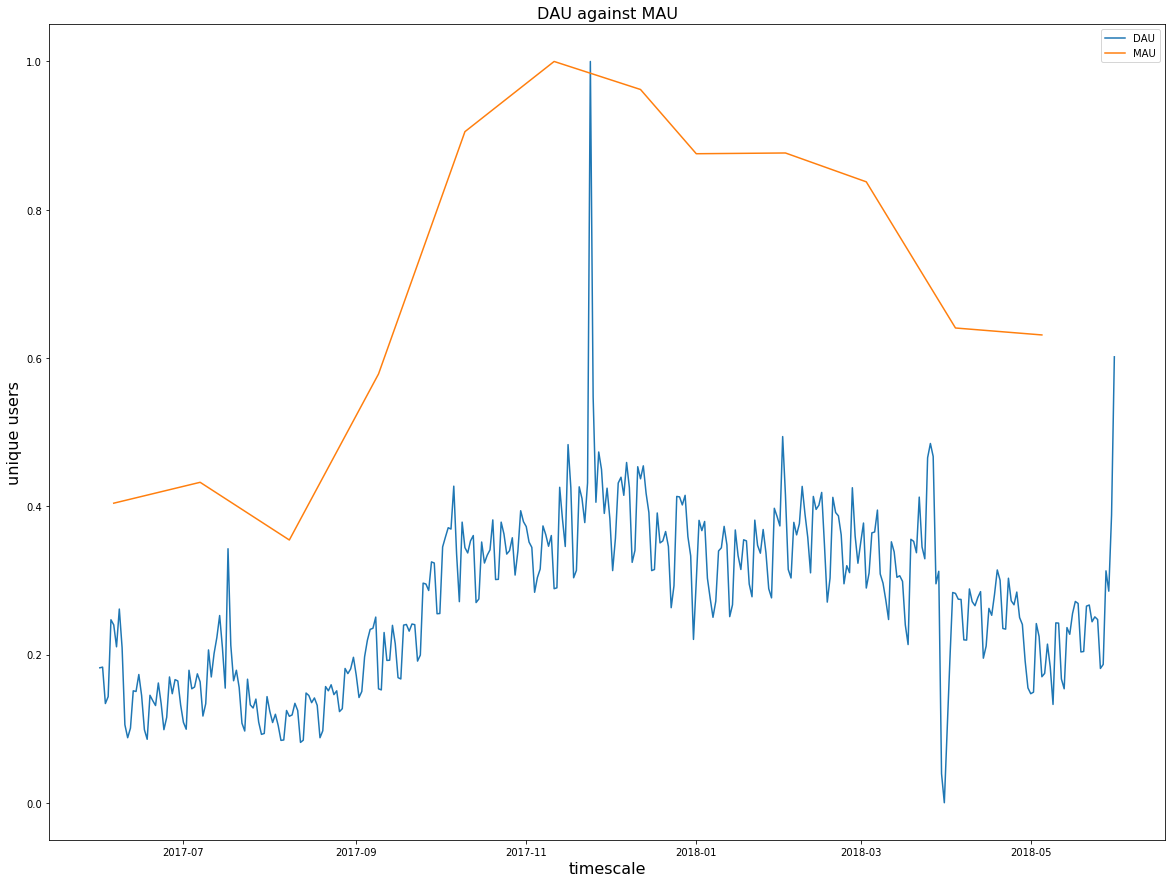

In [18]:
plt.figure(figsize=(20,15))
sns.lineplot(data=dau, x="ts", y="sticky",label="DAU")
sns.lineplot(data=mau, x="ts", y="sticky",label="MAU")
plt.title('DAU against MAU', fontsize=16)
plt.xlabel("timescale",fontsize=16)
plt.ylabel("unique users",fontsize=16);

At the very last point Daily values rose up, but general trend is going downwards, though it might be partly explained by the business season-sensitivity. Summertime is popular vacation season in Russia.

#### 2.1.3 How many sessions are there per day? 

In [19]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
dev           359400 non-null category
end_ts        359400 non-null datetime64[ns]
src_id        359400 non-null int64
start_ts      359400 non-null datetime64[ns]
uid           359400 non-null uint64
sess_day      359400 non-null int64
sess_week     359400 non-null int64
sess_month    359400 non-null int64
sess_year     359400 non-null int64
dtypes: category(1), datetime64[ns](2), int64(5), uint64(1)
memory usage: 22.3 MB


In [20]:
visits['start_day'] = pd.to_datetime(visits['start_ts']).dt.date
sess_daily = visits.groupby('start_day').agg({'uid':'count'}).reset_index()

In [21]:
fig = px.line(sess_daily, x="start_day", y="uid", title='Daily number of non-unique sessions', labels={
                     "ts": "timescale",
                     "uid": "non-unique sessions"                    
                 })
fig.update_xaxes(dtick='M1')
fig.show()

March 31, the nadir point of the plot, according to web.archive.org was the day of some IT issue, at least it only showed captcha page to the archive parser bot that day, in contrast with other dates. November's peak might be related to H.I.M farewell tour which were going these days as archive suggests, but I'm not sure why exactly 24th, amongst surrounding dates was the very vertex, probably some popular media published links that day, or it might be some data distortion.

In [22]:
sess_daily_touch = visits[visits['dev']=="touch"].groupby('start_day', ).agg({'uid':'count'}).reset_index()
sess_daily_desk = visits[visits['dev']=="desktop"].groupby('start_day', ).agg({'uid':'count'}).reset_index()

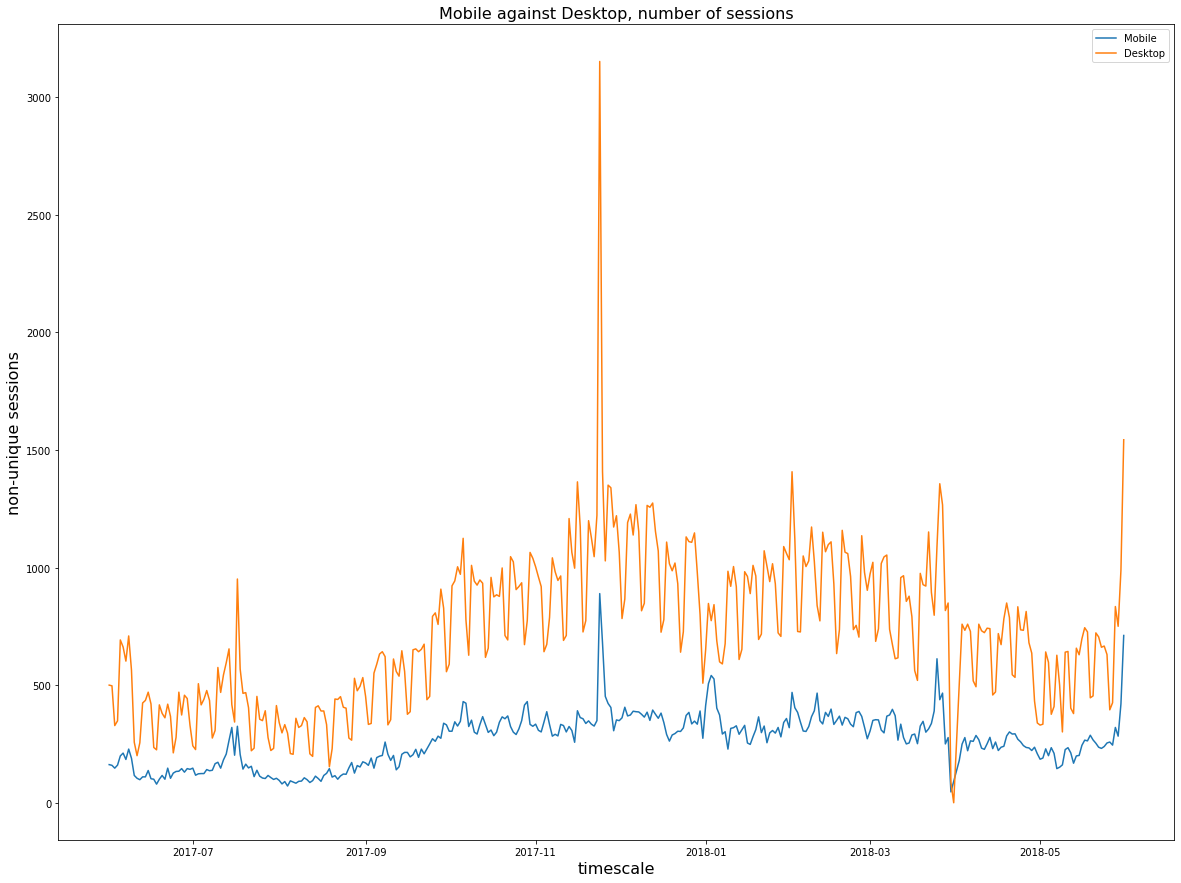

In [23]:
plt.figure(figsize=(20,15))
plt.title('Mobile against Desktop, number of sessions', fontsize=16)
sns.lineplot(data=sess_daily_touch, x="start_day", y="uid",label="Mobile")
sns.lineplot(data=sess_daily_desk, x="start_day", y="uid",label="Desktop")
plt.xlabel("timescale",fontsize=16)
plt.ylabel("non-unique sessions",fontsize=16);

Asked to guess I would say mobile is going to be the most popular platform for this kind of service in 2017-18. But the data show different picture. Well, probably it depends on the audience to some extent, maybe most touch users aren't in the statistics cause they used mobile application instead of web-interface? Here I would contact the Afisha team to find out what's going on here. 

Little research showed Afisha only have app for Apple devices. Wow. Though I personally prefer using web interfaces when possible on my Android device rather than installing apps when I already have 100+ of them, I would suggest conquering Google Play market ASAP. There was no app during the period we have data for, and there is still no app for Android. It's definitely the reason for loss of part of mobile audience. Maybe there're some specific reason why Yandex opted not to launch an Android app?

#### 2.1.4 What is the length of each session?

In [24]:
visits['sess_len']=(visits['end_ts']-visits['start_ts']).dt.seconds

In [25]:
dur_plot2 = visits.query('sess_len < 20000').groupby('sess_len').agg({'uid':'count'}).reset_index()
fig = px.bar(dur_plot2, x='sess_len', y='uid', title='Session lengths', color_continuous_scale=px.colors.sequential.Inferno, labels={
                     "sess_len": "session duration in seconds",
                     "uid": "number of sessions"                    
                 })
fig.show()

No need to cut outliers here, plotly gives ability to zoom in and out however I want, but I'm slicing it, just to show. Short sessions are prevalent by far, obviously. Don't think Afisha designed to attract users attention for a long session time.

Most sessions are terminated within a minute or two. Maybe some people couldn't find what they expected to. Or, most likely, there's some info to check really quickly, like where's tha party tonight, and ppl are just checking quickly. 

In [26]:
dur_plot3 = visits.groupby('sess_len').agg({'uid':'count'}).reset_index()
dur_plot3 = dur_plot3[(dur_plot3['uid'] > 50) & (dur_plot3['uid'] < 30000)]
fig = px.bar(dur_plot3, x='sess_len', y='uid', color='sess_len', #marginal_x="box", marginal_y="violin", 
             title='Session lengths', color_continuous_scale=px.colors.sequential.Inferno, labels={
                     "sess_len": "session duration in seconds",
                     "uid": "number of sessions"                    
                 })
fig.show()

In [27]:
print('Median session length:',int(visits['sess_len'].median()))

Median session length: 300


In [28]:
print('Typical session lasts',int(visits['sess_len'].mode()), 'seconds')

Typical session lasts 60 seconds


With distribution that skewed, mode seems to be the right value to say it's average 

The fact that sessions are mostly so short is not so surprising nor actually disturbing, maybe some people already know what they're looking for, so they can satisfy their attention in less than a minute. When I visited Afisha, I found couple of events I'd visit if I were in Moscow in less than a minute, that's not a portal I'd spend hours on anyway. 

#### 2.1.5 How often do users come back?

In [29]:
first_visit=visits.groupby('uid')['start_ts'].min()
first_visit.name='first_visit_dt'
vis_coh=visits.merge(first_visit,on='uid')
vis_coh['visit_month']=vis_coh['start_ts'].astype('datetime64[M]')
vis_coh['1st_visit_month']=vis_coh['first_visit_dt'].astype('datetime64[M]')
vis_coh['coh_life']=((vis_coh['visit_month']-vis_coh['1st_visit_month'])/np.timedelta64(1,'M')).round().astype(int)
cohorts=vis_coh.groupby(['1st_visit_month','coh_life']).agg({'uid':'count'}).reset_index()
initial_users=cohorts[cohorts['coh_life']==0][['1st_visit_month','uid']].rename(columns={'uid':'cohort_users'})
cohorts=cohorts.merge(initial_users,on='1st_visit_month')
cohorts['retention']=cohorts['uid']/cohorts['cohort_users']
cohorts['1st_visit_month']=pd.to_datetime(cohorts['1st_visit_month']).dt.date
retention_pivot=cohorts.pivot_table(index='1st_visit_month',columns='coh_life',values='retention',aggfunc='sum')

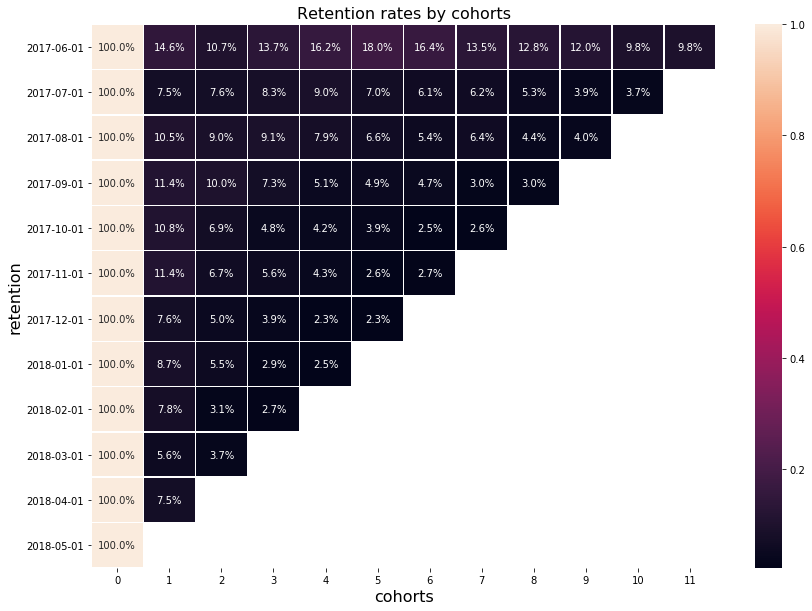

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
plt.title('Retention rates by cohorts', fontsize=16)
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=.5)
plt.xlabel("cohorts",fontsize=16)
plt.ylabel("retention",fontsize=16);

All values seem to be pretty small and all are regressing. June 17 is the top one, maybe it was some promo attracted businesses bulk buyers interested in ticket sales. March 18 is antileader here. 
The retention rates are in gradual decrease, both temporally, which is not so surprising, and by cohorts, latter groups show lesser retention. Good thing is now can we see it. 

### 2.2 Sales

#### 2.2.1 When do people start buying?

In [31]:
min_visit=visits.groupby(['uid'])['start_ts'].min().reset_index()
min_order=orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_visits=min_visit.merge(min_order,on=['uid'],how='right')

Let's find how many users made order before their first session, I heard there was a bug

In [32]:
first_visits.query('buy_ts < start_ts')

Empty DataFrame
Columns: [uid, start_ts, buy_ts]
Index: []

None

In [33]:
first_orders=min_order.merge(min_visit,on=['uid'],how='left')
first_orders.sample()

uid              buy_ts            start_ts
2347  1207837382617612773 2018-04-20 20:54:00 2017-08-16 12:12:00

Here we go with converted ones only

In [34]:
first_orders['conversion_time']=((first_orders['start_ts']-first_orders['buy_ts'])/np.timedelta64(1,'D')).round().astype(int)
source_groups=visits.groupby(['uid'])['src_id'].min().reset_index()
first_orders=first_orders.merge(source_groups,on='uid',how='left')
conversion_by_src=first_orders.groupby('src_id')['conversion_time'].mean().abs().reset_index()
conversion_by_src['src_id'] = conversion_by_src['src_id'].astype('category')

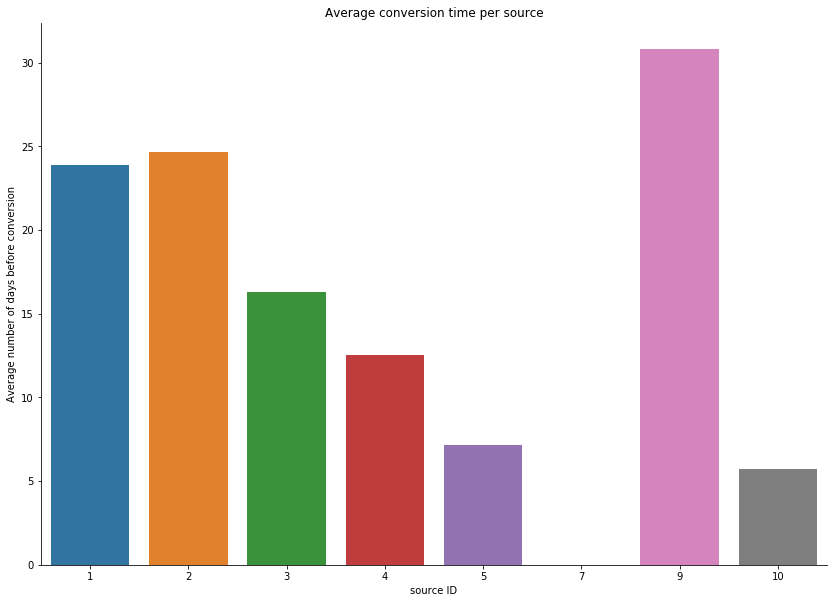

In [35]:
sns.catplot(x="src_id", y="conversion_time", kind="bar", data=conversion_by_src, height=8.27, aspect=11.7/8.27)
plt.xlabel('source ID')
plt.ylabel('Average number of days before conversion')
plt.title('Average conversion time per source');

In [36]:
visits.src_id.unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

We don't have source #8 here. 9th the slowest, 1,2,3,4 are slightly faster, 5th and 10th are going pretty quick with an average of a few days, 7th are instantaneous, wow! whole source of the same day buyers. It still might be a data distortion, but deserves investigation, I'd love to have more info on sources  

In [37]:
visits.query('src_id == 7')['uid'].nunique()

34

Just a few users. Migt be also a situation when users start sessions from another device by the link they already had

In [38]:
source_count=visits.groupby(['src_id'])['uid'].nunique().reset_index()
source_count

src_id    uid
0       1  18999
1       2  26245
2       3  74756
3       4  83525
4       5  56974
5       6      6
6       7     34
7       9   9264
8      10   8067

3,4,5 brought majority of users. wondering what exactly sources are behind these numbers. why 7 and 6 brought so much less, and what are mysterious 7th instant-convertees?

In [39]:
len(visits.groupby(['uid'])['src_id'].nunique().reset_index().query('src_id > 1'))

37720

some users came from multiple sources. I guess it's normal. like once in a while someone clicks on context ad, and another day this same person cometh through a search engine link. Would be nice to visualize overlappings, but what would it give me without knowledge of what the sources actually are?

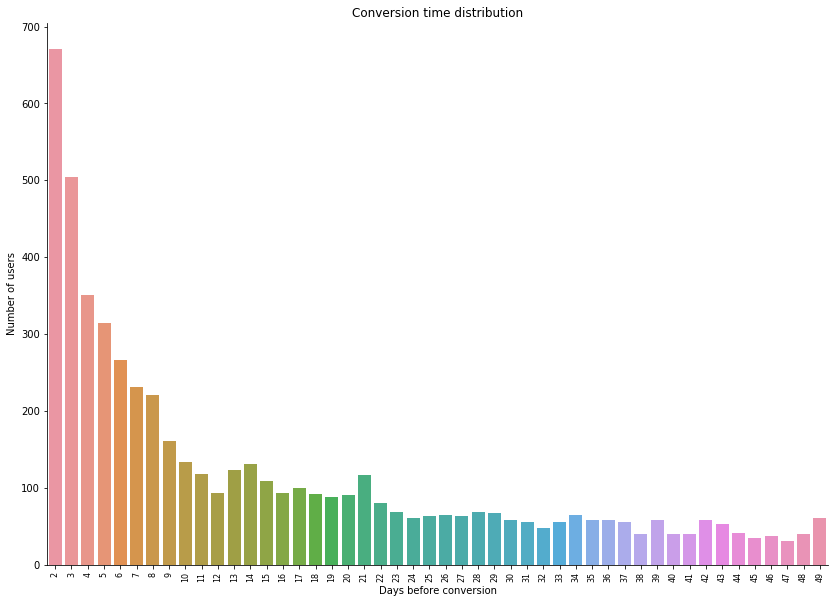

In [40]:
conversions_time=first_orders.groupby('conversion_time')['uid'].count().reset_index()
conversions_time['conversion_time']=conversions_time['conversion_time'].abs()
sns.catplot(x="conversion_time", y="uid", kind="bar", data=conversions_time.query('conversion_time < 50 & uid < 800'), height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90, fontsize=8);
plt.xlabel('Days before conversion')
plt.ylabel('Number of users')
plt.title('Conversion time distribution');

In [41]:
print('Only', conversions_time.query('conversion_time>21')['uid'].sum(), 'peolpe make orders after the third week')

Only 5524 peolpe make orders after the third week


In [42]:
print(conversions_time.query('conversion_time==0')['uid'].sum(), 'peolpe make 0 day')

25217 peolpe make 0 day


Vast majority cashed out 0 day, much less but still a lot went another day, substantial amounts paid in the first week, over 100 in the first three weeks, and the very few did so all along the way up, just several people made their purchases every next day up to the very end of the dataset, 363rd day. 

Checked what's going on up there by zooming out with query method. Just a few dozens make orders after 50 days, and this number's gradually declining with longer lag. Less than a dozen all the way up from 200. And like there's almost no life after 300 with only several buyers each tick.

That's OK for this kind of service, I think most people come to buy tickets for some particular event, lesser group might just make impulsive orders whenever they want to hang out. We might desire to see a different situation, but I think the general audience is just not going out very frequently.

#### 2.2.2 How many orders do they make during a given period of time?

In [43]:
print ('Totally we have info regarding', len(orders), 'orders, and', orders['uid'].nunique(), 'of those made by unique customers')

Totally we have info regarding 50415 orders, and 36523 of those made by unique customers


In [44]:
print(orders.uid.value_counts().unique())

[239 238 227 183 150 131 127 124 117 115 101  90  85  74  68  62  61  54
  50  48  47  46  45  43  42  40  39  38  37  36  34  33  31  29  28  27
  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11  10   9
   8   7   6   5   4   3   2   1]


OK, we have some frequent buyers, someone cashed out 239 times

In [45]:
print('Total of', len(set(orders['uid'].unique())), 'unique users made purchases vs', len(set(visits['uid'].unique())-set(orders['uid'].unique())), 'of never converted visitors')

Total of 36523 unique users made purchases vs 191646 of never converted visitors


In [46]:
orders_total=orders.rename(columns={'buy_ts':'order_time'}).merge(vis_coh,on='uid')
orders_monthy=orders_total.groupby('1st_visit_month')['order_time'].count().reset_index()
uniq_orders_monthly=orders_total.groupby('1st_visit_month')['uid'].nunique().reset_index()
orders_monthy = orders_monthy.merge(uniq_orders_monthly,how='outer')
orders_monthy['orders_per_user'] = (orders_monthy['order_time']/orders_monthy['uid']).round(1)

In [47]:
fig=px.bar(orders_monthy,x='1st_visit_month',y='orders_per_user',text='orders_per_user',title='Avg orders for cohorts by 1st visit month', labels={"orders_per_user": "average orders per user","1st_visit_month": "first visit month"})
fig.update_traces(textfont_size=14)
fig.update_xaxes(dtick='M1',tickformat='%b\n%Y')
fig.show()

In [48]:
(orders_monthy['orders_per_user'].sum()-153.2).round(1)

109.7

It's totally predictable to see earlier cohorts having more orders, they had more time to buy. But how much more? Almost 30% more than all other months combined!! What happened in June exactly? 
It could be some promo, or some interference with other parts of the dataset I don't have here (real total numbers for Yandex Afisha are much higher, and it's history dates back to 2005, I actually visited it several times myself, but never converted). In Russian setting it could be something like a group of users from official institutions, who registered simultaneously in July and were buying large portions of tickets for budget funds to fill events their colleagues organized, or may be it's some business partners, but that's just a guess, I don't know. I don't have enough info to find exactly the matter here. 

#### 2.2.3 What is the average purchase size?

In [49]:
print('Total average purchase for all the period is', orders['rev'].median())

Total average purchase for all the period is 2.5


Let's assume it is thousands of rubles. 

In [50]:
avg_purchase_by_month = orders.groupby(orders.buy_ts.astype('datetime64[M]'))['rev'].median().reset_index()
fig=px.bar(avg_purchase_by_month,x='buy_ts',y='rev',text='rev',title='Average purchase size per month', labels={"rev": "revenue in thousands of rubles","buy_ts": "order month"})
fig.update_traces(textfont_size=14)
fig.update_xaxes(dtick='M1',tickformat='%b\n%Y')
fig.show()

Why do summer months have greater averages, than more active in terms of visiting winter months?

Why do summer months have greater averages, comparing to more active in terms of visiting winter months? Let's visualize visits density on the plot. 

In [51]:
print('We only have', len(orders[(orders['buy_ts'] > '2018-06-01 00:00:00')]), 'order in June 2018 in the dataset, so I excluded it below')

We only have 1 order in June 2018 in the dataset, so I excluded it below


In [52]:
orders2=orders[(orders['buy_ts'] < '2018-06-01 00:00:00')].copy()
orders2['orders_total_no']=orders2['uid']
avg_revenue_by_month2 = orders2.groupby(orders.buy_ts.astype('datetime64[M]')).agg({'rev' : np.median,
                                                                                  'orders_total_no' : 'count'}).reset_index()

fig=px.bar(avg_revenue_by_month2,x='buy_ts',y='rev',text='rev', color="orders_total_no", title='Average purchase size per month with orders density', labels={"rev": "revenue in thousands of rubles","buy_ts": "order month","orders_total_no": "orders density"})
fig.update_traces(textfont_size=14)
fig.update_xaxes(dtick='M1',tickformat='%b\n%Y')
fig.show()

Oh, I got it. About three times more orders in December, comparing to August, wow! Winter month's are the densest, but orders frequency negatively correlates with order size. Since summer is not the season for events business, guess prices are rising at the summertime, to compensate sparse density. Nobody cancels rent and utilities even for seasonal businesses.

In [53]:
min_visit=visits.groupby(['uid'])['start_ts'].min()
orders_by_1st_visit=orders[(orders['buy_ts'] < '2018-06-01 00:00:00')].merge(min_visit,on=['uid'],how='left').reset_index()
orders_by_1st_visit['uid_count']=orders_by_1st_visit['uid'].copy()
orders2=orders[(orders['buy_ts'] < '2018-06-01 00:00:00')].copy()
orders2['orders_total_no']=orders2['uid']
avg_purchase_by_month = orders_by_1st_visit.groupby(orders_by_1st_visit.start_ts.astype('datetime64[M]')).agg({'rev' : 'sum',
                                                                                  'uid_count' : 'count'}).reset_index()
avg_purchase_by_month['avg_purchase']=(avg_purchase_by_month['rev'].round()/avg_purchase_by_month['uid_count']).round(1)
fig=px.bar(avg_purchase_by_month,x='start_ts',y='avg_purchase',text='avg_purchase', color="uid_count", title='Average spent per order for 1st visit cohorts', labels={"rev": "average revenue in thousands of rubles","start_ts": "1st visit month","uid_count": "orders density"})
fig.update_traces(textfont_size=14)
fig.update_xaxes(dtick='M1',tickformat='%b\n%Y')
fig.show()

September registrations brought the largest orders! Cool. Wondering, why? Maybe it's those people who came back from summer vacations and since September they're ready to spend their rubles locally? Anyways, September cohort origination deserves further investigation.

#### 2.2.4 How much money do they bring? (LTV)

In [54]:
print ('Total median LTV for all the period is', orders.groupby(orders.uid).agg('sum')['rev'].median(), '(thousand rubles)')

Total median LTV for all the period is 3.05 (thousand rubles)


In [55]:
min_visit=visits.groupby(['uid'])['start_ts'].min()
orders_by_1st_visit=orders[(orders['buy_ts'] < '2018-06-01 00:00:00')].merge(min_visit,on=['uid'],how='left').reset_index()
orders_by_1st_visit['uid_count']=orders_by_1st_visit['uid'].copy()
ltv_table2 = orders_by_1st_visit.groupby(orders_by_1st_visit.uid).agg({'rev' : 'sum', 'start_ts' : 'min', 'uid_count' : 'count'})
ltv_by_first_visit_cohorts = ltv_table2.groupby(ltv_table2.start_ts.astype('datetime64[M]')).agg({'rev' : 'sum', 'uid_count' : 'sum'}).reset_index()
ltv_by_first_visit_cohorts['rev']=ltv_by_first_visit_cohorts['rev'].round()
fig=px.bar(ltv_by_first_visit_cohorts,x='start_ts',y='rev',text='rev', color="uid_count", title='1st visit month cohorts summary revenue', labels={"rev": "mean spendings","start_ts": "cohorts","uid_count": "orders density"})
fig.update_traces(textfont_size=14)
fig.update_xaxes(dtick='M1',tickformat='%b\n%Y')
fig.show()

June is on top, but winter is still most profitable season.

In [56]:
min_visit=visits.groupby(['uid'])['start_ts'].min()
orders_by_1st_visit=orders[(orders['buy_ts'] < '2018-06-01 00:00:00')].merge(min_visit,on=['uid'],how='left').reset_index()
orders_by_1st_visit['uid_count']=orders_by_1st_visit['uid'].copy()
ltv_table2 = orders_by_1st_visit.groupby(orders_by_1st_visit.uid).agg({'rev' : 'sum', 'start_ts' : 'min', 'uid_count' : 'count'})
ltv_by_first_visit_cohorts = ltv_table2.groupby(ltv_table2.start_ts.astype('datetime64[M]')).agg({'rev' : 'sum', 'uid_count' : 'sum'}).reset_index()
ltv_by_first_visit_cohorts['rev']=(ltv_by_first_visit_cohorts['rev']/ltv_by_first_visit_cohorts['uid_count']).round()
fig=px.bar(ltv_by_first_visit_cohorts,x='start_ts',y='rev',text='rev', color="uid_count", title='1st visit month AVG LTV', labels={"rev": "mean spendings","start_ts": "cohorts","uid_count": "orders density"})
fig.update_traces(textfont_size=14)
fig.update_xaxes(dtick='M1',tickformat='%b\n%Y')
fig.show()

In [57]:
rev_sum=orders.groupby(['uid'])['rev'].sum().reset_index()
rev_sum=rev_sum.merge(first_orders,on='uid')
rev_by_src=rev_sum.groupby(['src_id'])['rev'].mean().reset_index()
rev_by_src['rev']=rev_by_src['rev'].round(1)
fig=px.bar(rev_by_src,x='src_id',y='rev',text='rev', title='Avg per user total revenue by source', labels={"rev": "thousands rubles","src_id": "source"})
fig.update_xaxes(dtick=1,tick0=0)
fig.show()

1,2 are leading here, curious to know what these IDs stand for. 8 is just an artefact here, we don't have source #8, 6th brings nothing, 7th is the least interesting. 3,4,5,8,10 make the middle on this graph.

In [58]:
orders['order_month']=orders[(orders['buy_ts'] < '2018-06-01 00:00:00')]['buy_ts'].astype('datetime64[M]')
orders5=orders.copy()
min_orders=orders5.groupby(['uid'])['order_month'].min().reset_index()
min_orders=min_orders.rename(columns={'order_month': '1st_order_month'})
cohort_population=min_orders.groupby('1st_order_month')['uid'].nunique().reset_index()
cohort_population=cohort_population.rename(columns={'order_month': '1st_order_month', 'uid': 'customers_count'})
cohorts5=orders.merge(min_orders,on='uid').groupby(['1st_order_month','order_month']).agg({'rev':'sum'}).reset_index()
ltv_table=cohort_population.merge(cohorts5,on='1st_order_month')
ltv_table['life']=((ltv_table['1st_order_month']-ltv_table['order_month'])/np.timedelta64(1,'M')).round().astype(int).abs()
ltv_table['ltv']=ltv_table['rev']/ltv_table['customers_count']
ltv_table['1st_order_month']=pd.to_datetime(ltv_table['1st_order_month']).dt.date
ltv_pivot=ltv_table.pivot_table(index='1st_order_month',columns='life',values='ltv',aggfunc='mean').round(2)

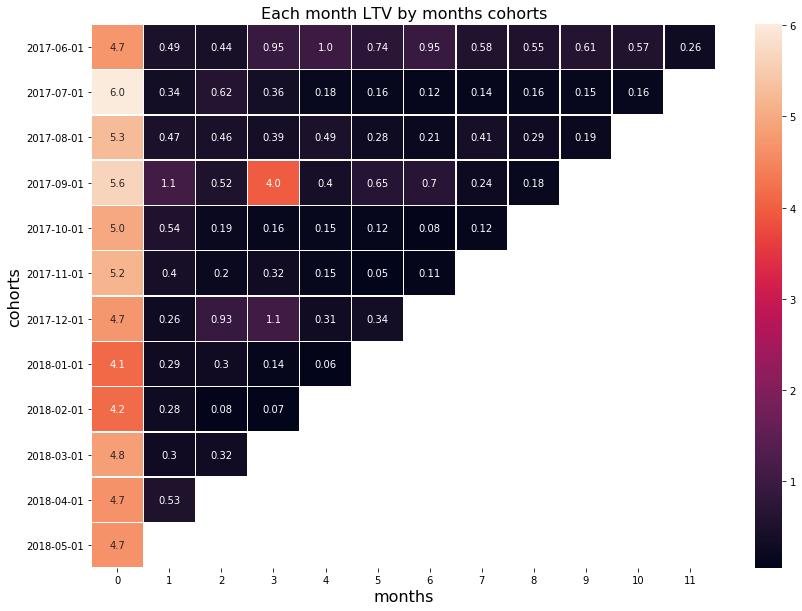

In [59]:
plt.figure(figsize=(14, 10))
plt.title('Each month LTV by months cohorts', fontsize=16)
sns.heatmap(ltv_pivot, annot=True, fmt='.2', linewidths=.5)
plt.xlabel("months",fontsize=16)
plt.ylabel("cohorts",fontsize=16);

This color scheme resembles infrared vision to me. 

What's the September cohort secret? Why did they pay more in November? I think it might be related to some specific event of an artist with particularly large audience, but surfing w/web.archive.org/ didn't give me a clue this time.

So, lifetime values are modest, ranging around several thousands rubles. Maybe the business have some other means of extracting profits? 

### 2.3 Marketing

#### 2.3.1 How much money was spent? Overall/per source/over time

In [60]:
print('Total marketing expenditures:', costs['costs'].sum().round(), '|', 'Total revenue:', orders['rev'].sum().round(), '|', 'Total ROMI:', (costs['costs'].sum()/orders['rev'].sum()).round(1))

Total marketing expenditures: 329132.0 | Total revenue: 252057.0 | Total ROMI: 1.3


In [61]:
total_rev_by_src=rev_sum.groupby(['src_id'])['rev'].sum().reset_index()
total_rev_by_src['rev']=total_rev_by_src['rev'].round(1)
total_rev_by_src['percent']=(total_rev_by_src['rev']/(total_rev_by_src['rev'].sum()/100)).round(4)
total_rev_by_src

src_id       rev  percent
0       1  101631.4  40.3208
1       2   43123.7  17.1087
2       3   43354.8  17.2004
3       4   36705.8  14.5625
4       5   22919.8   9.0931
5       7       1.2   0.0005
6       9    1874.2   0.7436
7      10    2446.2   0.9705

Ha-ha, I needed 5(!) digits after decimal point to make 5th source show up in the percent column. Whatever it is, if it costs something, it needs urgent attention, probably it can be fixed, or, otherwise, company can refuse from 7th source.

In [62]:
costs_by_src=costs.groupby(['src_id'])['costs'].sum().reset_index()
costs_by_src['costs']=costs_by_src['costs'].round()
costs_by_src

src_id     costs
0      1   20833.0
1     10    5822.0
2      2   42806.0
3      3  141322.0
4      4   61074.0
5      5   51757.0
6      9    5517.0

OK, now we know, 7th and 6th are probably free. So, low results they bring are OK.

In [63]:
fig=px.bar(costs_by_src,x='src_id',y='costs',text='costs',title='Company investments by source', labels={"costs": "thousands of rubles","src_id": "source ID"})
fig.update_traces(textfont_size=14)
fig.update_xaxes(dtick=1,tick0=0)
fig.show()

3rd source is the most expensive. Let's compare.

In [64]:
costs_by_src['src_id']=costs_by_src['src_id'].astype(int)
costs_by_src.sort_values(by='src_id').reset_index()
revenue_vs_costs = total_rev_by_src.drop(['percent'], axis=1).merge(costs_by_src, on='src_id',how='left')
revenue_vs_costs

src_id       rev     costs
0       1  101631.4   20833.0
1       2   43123.7   42806.0
2       3   43354.8  141322.0
3       4   36705.8   61074.0
4       5   22919.8   51757.0
5       7       1.2       NaN
6       9    1874.2    5517.0
7      10    2446.2    5822.0

In [65]:
def px_stacked_bar(df, color_name='category', y_name='thousands rubles'):
    idx_col = df.index.name
    m = pd.melt(df.reset_index(), id_vars=idx_col, var_name=color_name, value_name=y_name)
    return px.bar(m, x=idx_col, y=y_name, color=color_name)
revenue_vs_costs2=revenue_vs_costs.copy()
revenue_vs_costs2['soruce ID']=revenue_vs_costs2['src_id']
px_stacked_bar(revenue_vs_costs2.set_index('soruce ID')).update_xaxes(dtick=1,tickformat='f')

So, for the 1st source all seems to be not too bad, marketing costs ~20% of revenue. Second source is clearly unprofitable, with revenue insignificantly exceeding expenditures. 

3rd source is a total disaster! Something must be done ASAP, it brings substantial losses. 4, 5, 9, 10 - all these sources are doing really bad, bringing losses in the given period. 

In [66]:
costs2=costs.copy()
costs2['src_id']=costs2['src_id'].astype(int)
monthly_marketing=costs2.pivot_table(index=costs2['dt'].astype('datetime64[M]').dt.date,columns='src_id',values='costs',aggfunc='sum')

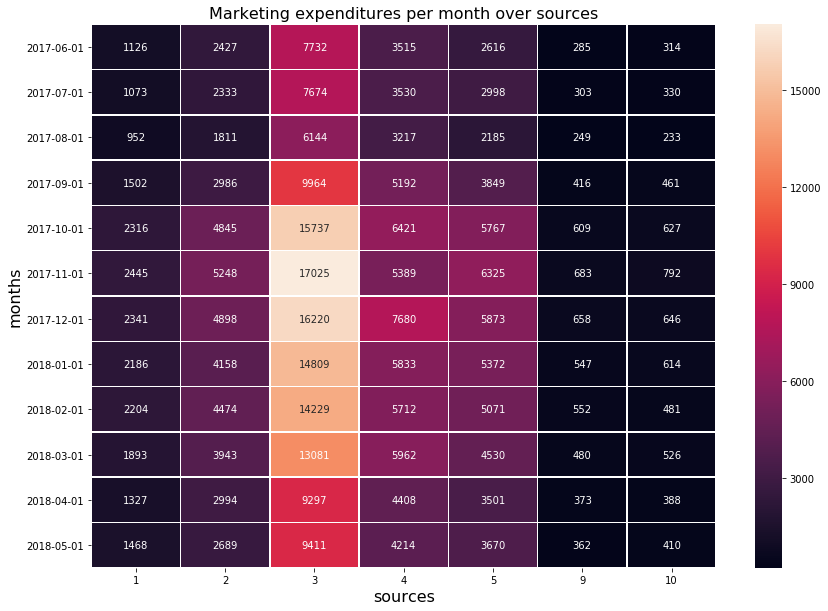

In [67]:
plt.figure(figsize=(14, 10))
plt.title('Marketing expenditures per month over sources', fontsize=16)
sns.heatmap(monthly_marketing, annot=True, fmt='.0f', linewidths=.5)
plt.xlabel("sources",fontsize=16)
plt.ylabel("months",fontsize=16);

This graph makes sense. we already know 3rd source is a fund drain, but here it's clearly visible that 10, 11, 12 months were the worst. It could be an important clue if I had more information. From October to March we see the most active marketing activity.

In [68]:
monthly_marketing2=costs.groupby(costs2['dt'].astype('datetime64[M]').dt.date)['costs'].sum().reset_index()
monthly_marketing2

dt     costs
0   2017-06-01  18015.00
1   2017-07-01  18240.59
2   2017-08-01  14790.54
3   2017-09-01  24368.91
4   2017-10-01  36322.88
5   2017-11-01  37907.88
6   2017-12-01  38315.35
7   2018-01-01  33518.52
8   2018-02-01  32723.03
9   2018-03-01  30415.27
10  2018-04-01  22289.38
11  2018-05-01  22224.27

In [69]:
costs7=costs.copy()
costs7['src_id']=costs7['src_id'].astype(int)
monthly_marketing3=costs7.pivot_table(index=[costs2['dt'].astype('datetime64[M]').dt.date, 'src_id'],values='costs',aggfunc='sum')

In [70]:
monthly_marketing3.unstack(level=0)

costs                                                         \
dt     2017-06-01 2017-07-01 2017-08-01 2017-09-01 2017-10-01 2017-11-01   
src_id                                                                     
1         1125.61    1072.88     951.81    1502.01    2315.75    2445.16   
2         2427.38    2333.11    1811.05    2985.66    4845.00    5247.68   
3         7731.65    7674.37    6143.54    9963.55   15737.24   17025.34   
4         3514.80    3529.73    3217.36    5192.26    6420.84    5388.82   
5         2616.12    2998.14    2185.28    3849.14    5767.40    6325.34   
9          285.22     302.54     248.93     415.62     609.41     683.18   
10         314.22     329.82     232.57     460.67     627.24     792.36   

                                                                          
dt     2017-12-01 2018-01-01 2018-02-01 2018-03-01 2018-04-01 2018-05-01  
src_id                                                                    
1         2341.20    2186.18    2204.48    1893.09    1327.49    1467.61  
2         4897.80    4157.74    4474.34    3943.14    2993.70    2689.44  
3        16219.52   14808.78   14228.56   13080.85    9296.81    9411.42  
4         7680.47    5832.79    5711.96    5961.87    4408.49    4214.21  
5         5872.52    5371.52    5071.31    4529.62    3501.15    3669.56  
9          657.98     547.16     551.50     480.29     373.49     362.17  
10         645.86     614.35     480.88     526.41     388.25     409.86

Winter months cost more. Sure, they're most dense, as was shown above, it's the main season for the business.

#### 2.3.2 How much did customer acquisition from each of the sources cost?

In [71]:
orders_source_count=first_orders.groupby(['src_id'])['uid'].nunique().reset_index().rename(columns={'uid': 'uniq_buyers_count'})
cac_by_src = orders_source_count.merge(costs_by_src.sort_values(by='src_id'), on='src_id',how='left') 
cac_by_src['cac']=cac_by_src['costs']/cac_by_src['uniq_buyers_count']
cac_by_src

src_id  uniq_buyers_count     costs        cac
0       1               7138   20833.0   2.918605
1       2               5336   42806.0   8.022114
2       3               9619  141322.0  14.691964
3       4               8138   61074.0   7.504792
4       5               4879   51757.0  10.608116
5       7                  1       NaN        NaN
6       9                527    5517.0  10.468691
7      10                885    5822.0   6.578531

In [72]:
fig=px.bar(cac_by_src.round(),x='src_id',y='cac',text='cac',title='Avg CAC by source', labels={"cac": "CAC","src_id": "source ID"})
fig.update_traces(textfont_size=14).update_xaxes(dtick=1,tickformat='f')
fig.show()

In [73]:
data_by_src = cac_by_src.merge(total_rev_by_src.drop('percent', axis=1).sort_values(by='src_id'), on='src_id',how='left') 
data_by_src=data_by_src.rename(columns={'rev': 'total_rev_per_src', 'cac': 'avg_cac_per_src', 'costs': 'total_costs_by_src'})
data_by_src=data_by_src.merge(rev_by_src.rename(columns={'rev': 'avg_ltv_per_src'}), on='src_id',how='left')     
data_by_src

src_id  uniq_buyers_count  total_costs_by_src  avg_cac_per_src  \
0       1               7138             20833.0         2.918605   
1       2               5336             42806.0         8.022114   
2       3               9619            141322.0        14.691964   
3       4               8138             61074.0         7.504792   
4       5               4879             51757.0        10.608116   
5       7                  1                 NaN              NaN   
6       9                527              5517.0        10.468691   
7      10                885              5822.0         6.578531   

   total_rev_per_src  avg_ltv_per_src  
0           101631.4             14.2  
1            43123.7              8.1  
2            43354.8              4.5  
3            36705.8              4.5  
4            22919.8              4.7  
5                1.2              1.2  
6             1874.2              3.6  
7             2446.2              2.8

In [74]:
def px_stacked_bar(df, color_name='data', y_name='thousand rubles'):
    idx_col = df.index.name
    m = pd.melt(df.reset_index(), id_vars=idx_col, var_name=color_name, value_name=y_name)
    return px.bar(m, x=idx_col, y=y_name, color=color_name)
data_by_src2=data_by_src.rename(columns={'src_id':'source','avg_cac_per_src':'CAC','avg_ltv_per_src':'LTV'}).drop(['uniq_buyers_count','total_costs_by_src','total_rev_per_src'], axis=1)
data_by_src2['CAC']=data_by_src2['CAC'].round(1)
px_stacked_bar(data_by_src2.set_index('source')).update_xaxes(dtick=1,tickformat='f')

Source #1 is doing good here, LTV is almost 5 times of CAC. 7th is OK, if it's actually free.
As we already seen, source 3 is the most problematic, CAC is about three times greater than LTV of it. 
2,4,5,9,10 all bring losses. As has been shown in chapter 2.3.1, absolute values show same dynamics, same investments/revenue correlation.

#### 2.3.3 How worthwhile where the investments? (ROI)

I wouldn't be able to tell much about ROI, with no info on business operational expenses, and with only a fraction of actual Afisha visitors in the dataset, I only can guess net profit values. From what I see here, it feels more like net loss.

In [75]:
revenue_vs_costs=revenue_vs_costs.rename(columns={'src_id': 'source'})
data_by_src=data_by_src.rename(columns={'src_id': 'source'})
data_by_src=data_by_src.merge(revenue_vs_costs.drop(['rev','costs'], axis=1), on='source',how='left')  
data_by_src

source  uniq_buyers_count  total_costs_by_src  avg_cac_per_src  \
0       1               7138             20833.0         2.918605   
1       2               5336             42806.0         8.022114   
2       3               9619            141322.0        14.691964   
3       4               8138             61074.0         7.504792   
4       5               4879             51757.0        10.608116   
5       7                  1                 NaN              NaN   
6       9                527              5517.0        10.468691   
7      10                885              5822.0         6.578531   

   total_rev_per_src  avg_ltv_per_src  
0           101631.4             14.2  
1            43123.7              8.1  
2            43354.8              4.5  
3            36705.8              4.5  
4            22919.8              4.7  
5                1.2              1.2  
6             1874.2              3.6  
7             2446.2              2.8

In [76]:
revenue_vs_costs=revenue_vs_costs.rename(columns={'src_id': 'source'})
data_by_src=data_by_src.rename(columns={'src_id': 'source'})
data_by_src=data_by_src.merge(revenue_vs_costs.drop(['rev','costs'], axis=1), on='source',how='left')  
data_by_src['total_ltv/total_cac']=(data_by_src['avg_ltv_per_src']/data_by_src['avg_cac_per_src'])
data_by_src['ROMI']=(data_by_src['avg_ltv_per_src']/data_by_src['uniq_buyers_count'])/(data_by_src['avg_cac_per_src']/data_by_src['uniq_buyers_count'])
data_by_src

source  uniq_buyers_count  total_costs_by_src  avg_cac_per_src  \
0       1               7138             20833.0         2.918605   
1       2               5336             42806.0         8.022114   
2       3               9619            141322.0        14.691964   
3       4               8138             61074.0         7.504792   
4       5               4879             51757.0        10.608116   
5       7                  1                 NaN              NaN   
6       9                527              5517.0        10.468691   
7      10                885              5822.0         6.578531   

   total_rev_per_src  avg_ltv_per_src  total_ltv/total_cac      ROMI  
0           101631.4             14.2             4.865339  4.865339  
1            43123.7              8.1             1.009709  1.009709  
2            43354.8              4.5             0.306290  0.306290  
3            36705.8              4.5             0.599617  0.599617  
4            22919.8              4.7             0.443057  0.443057  
5                1.2              1.2                  NaN       NaN  
6             1874.2              3.6             0.343883  0.343883  
7             2446.2              2.8             0.425627  0.425627

In [77]:
data_by_src3=data_by_src.copy()
fig=px.bar(data_by_src3.round(2),x='source',y='ROMI',text='ROMI',title='Return of marketing investments by source', labels={"rev": "revenue in thousands of rubles","buy_ts": "order month"})
fig.update_traces(textfont_size=12).update_xaxes(dtick=1,tickformat='f')
fig.update_traces(textfont_size=14)
fig.show()

LTV/CAC relation indicates payoff when it comes over 100%. Only 1st source looks profitable, so we probably could stake more on it. 2nd at least brings no losses on this graph. All the rest are doing bad, bringing substantial losses, Afisha have to do something about it. The 3rd source brings losses antirecord with ROMI of 0.3, requires action ASAP.

In [78]:
orders0=orders[(orders['buy_ts'] < '2018-06-01 00:00:00')].copy()
monthly_purchases2=orders0.groupby(orders0['buy_ts'].astype('datetime64[M]').dt.date)['rev'].sum().reset_index()
monthly_purchases2=monthly_purchases2.rename(columns={'buy_ts': 'dt'})
monthly_romi=monthly_purchases2.merge(monthly_marketing2, on='dt',how='left')
monthly_buyers2=orders0.groupby(orders0['buy_ts'].astype('datetime64[M]').dt.date)['uid'].count().reset_index()
monthly_buyers2=monthly_buyers2.rename(columns={'buy_ts': 'dt'})
monthly_romi=monthly_romi.merge(monthly_buyers2, on='dt',how='left')  
monthly_romi['ROMI']=(monthly_romi['rev']/monthly_romi['uid'])/(monthly_romi['costs']/monthly_romi['uid'])


fig=px.bar(monthly_romi.round(2),x='dt',y='ROMI',text='ROMI',title='Return of marketing investments by monthly buyer cohorts', labels={"ROMI": "Return of marketing investments","dt": "buyers cohort month"})
fig.update_traces(textfont_size=12).update_xaxes(dtick=1,tickformat='f')
fig.update_xaxes(dtick='M1',tickformat='%b\n%Y')
fig.update_traces(textfont_size=14)
fig.show()

This graph is very sad. All monthly cohorts are making losses. Losses only. December, March and May are closer to making zero, but none is positive. All that sounds really bad for a 10+ years old business, wondering how it looked in past years. 

In [79]:
(orders['rev'].sum()-costs['costs'].sum()).round()

-77074.0

I don't have data to calculate net loss. but even whithot operational expenses and other costs, I can see 77000 loss.

In [80]:
costs

src_id         dt  costs
0         1 2017-06-01  75.20
1         1 2017-06-02  62.25
2         1 2017-06-03  36.53
3         1 2017-06-04  55.00
4         1 2017-06-05  57.08
...     ...        ...    ...
2537     10 2018-05-27   9.92
2538     10 2018-05-28  21.26
2539     10 2018-05-29  11.32
2540     10 2018-05-30  33.15
2541     10 2018-05-31  17.60

[2542 rows x 3 columns]

### Step 3. Conclusion

Mobile app could attract many. I would suggest conquering Google Play market ASAP. There was no app during the period we have data for, and there is still no app for Android. It's definitely the reason for loss of large part of audience.

Typical session lasts 60 seconds. The fact that sessions are mostly so short is not so surprising, probably people can satisfy their attention in less than a minute. Though it's not a portal I'd spend hours on anyway, Afisha might be interested to keep audience's attention for a longer time. Vast majority cashed out in the first days, few returned to buy again. Retention rates are low. I'm not aware of what's the best indicators for this kind of business are, but anyway, business have to aim for more. 

Entertainment industry gains momentum at winter, stickiness trend is going downwards, though it might probably be normal since this is season-sensitive business. Winter month's are the densest, but orders frequency negatively correlates with purchase size. It would be nice to research cohorts origins in details. June 2017 have better retention and they buy more, September registrations brought the largest orders, which might be related to active promotion during the winter season.

So, lifetime values are modest, ranging around several thousand rubles. Maybe the business have some other means of extracting profits? 

1 and 2 sources bring most users. 7th seem to be free. For the 1st source it seems not too bad, marketing costs ~20% of revenue. Second source is clearly unprofitable, with revenue insignificantly exceeding expenditures. 3rd source is a total disaster! Something must be done ASAP, it brings substantial losses. 4, 5, 9, 10 - all these sources are making losses. Only 1st source looks profitable, so we probably could stake more on it. 2nd at least brings no losses in terms of turnover. All the rest are doing bad, bringing substantial losses, Afisha have to do something about it. The 3rd source must be discontinued immediately, or at least until it's fixed, it drains funds rapidly with ROMI of 0.3.

Business is making losses. Urgent intervention required. December, March and May were closer to making zero, but none is positive. Probably wise promotion could bring desired results. Afisha have to develop new marketing strategy, otherwise project closure might be taken to consideration.